In [1]:
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

%matplotlib inline

In [2]:
def plot_separating_surface(X, y, cls, title=''):
    x_min = np.min(X[:, 0]) - 0.1
    x_max = np.max(X[:, 0]) + 0.1
    y_min = np.min(X[:, 1]) - 0.1
    y_max = np.max(X[:, 1]) + 0.1
    h = min(x_max - x_min, y_max - y_min) / 1000
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(10, 10))
    if title:
        plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.xticks(())
    plt.yticks(())
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.show()

In [3]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)

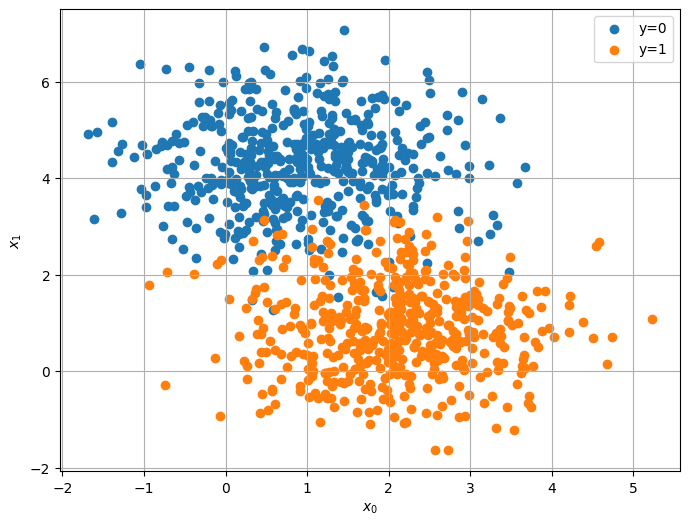

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='y=1')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid()

In [5]:
knn_class = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='cosine')
knn_class.fit(X, y)

KNeighborsClassifier(metric='cosine', weights='distance')

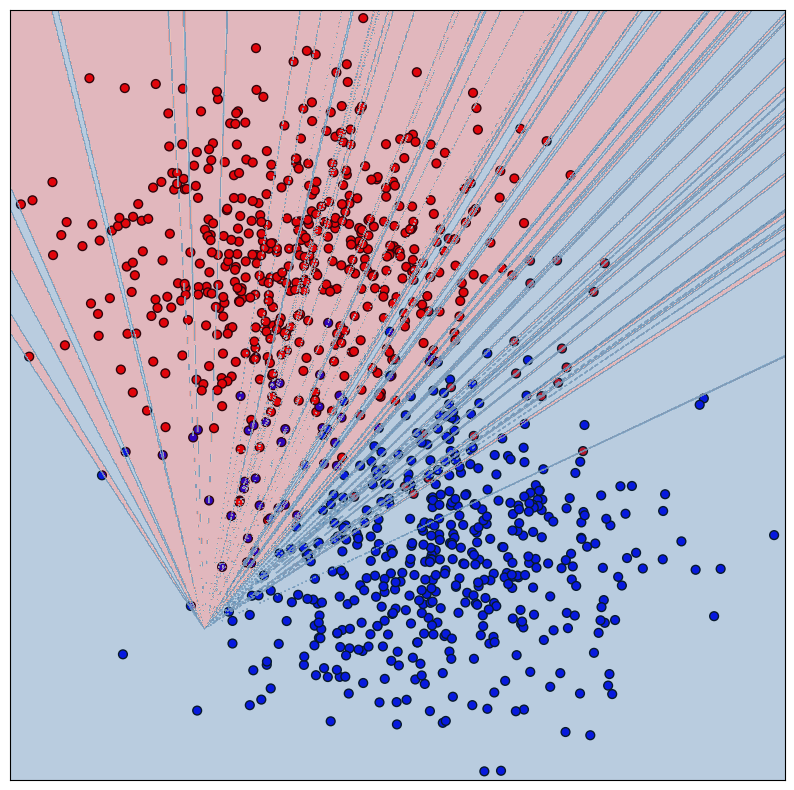

In [6]:
plot_separating_surface(X, y, knn_class)

In [7]:
from sklearn.datasets import fetch_20newsgroups

In [8]:
data = fetch_20newsgroups()

In [9]:
data['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
print(data['data'][18])

From: ritley@uimrl7.mrl.uiuc.edu ()
Subject: SEEKING THERMOCOUPLE AMPLIFIER CIRCUIT
Reply-To: ritley@uiucmrl.bitnet ()
Organization: Materials Research Lab
Lines: 17



I would like to be able to amplify a voltage signal which is
output from a thermocouple, preferably by a factor of
100 or 1000 ---- so that the resulting voltage can be fed
more easily into a personal-computer-based ADC data
acquisition card.

Might anyone be able to point me to references to such
circuits?  I have seen simple amplifier circuits before, but
I am not sure how well they work in practice.

In this case, I'd like something which will amplify sufficiently
"nicely" to be used for thermocouples (say, a few degrees
accuracy or better).

Any pointers would be greatly appreciated!



In [11]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [12]:
print(X_train[72])

From: harry@neuron6.jpl.nasa.gov (Harry Langenbacher)
Subject: Re: Uninterruptible Power Supply
Article-I.D.: jato.1993Apr15.225326.22831
Organization: JPL Pasadena CA
Lines: 25
Nntp-Posting-Host: neuron6.jpl.nasa.gov

In article <NURDEN1.25.734866568@elaine.ee.und.ac.za> NURDEN1@elaine.ee.und.ac.za (Dale Nurden) writes:
>I'm wanting to build a simple UPS for my PC. ... sustain the computer long enough to complete 
>the current task and save, 5 to 10 minutes should be enough....
>I think, though I don't really need to keep the monitor active (I can try to 
>remember what to do) so maybe I can avoid a DC-AC inverter and just use a 
>battery to directly supply the motherboard and peripherals.

Now there's a good idea ! All you need is 20 amps DC for a few minutes, and
a good (wetware) memory (was I using wp or autocad or ...). I thought of the
same idea myself a few days ago. I've got a fairly new car battery that I take
along in my 4x4 when I go camping, and it sits around useless when 

In [13]:
y_train[72]

12

In [14]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

TfidfVectorizer()

In [17]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [18]:
vectorizer.transform(corpus).toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [30]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=10, max_df=0.8)

In [31]:
vectorizer.fit(X_train)

TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X_train_vect = vectorizer.transform(X_train).toarray()
X_test_vect = vectorizer.transform(X_test).toarray()

In [32]:
knn_class = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='cosine')
knn_class.fit(X_train_vect, y_train)

KNeighborsClassifier(metric='cosine')

In [33]:
y_pred = knn_class.predict(X_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred)

0.6594530005310675

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 80.7222222222222, 'Predicted label')

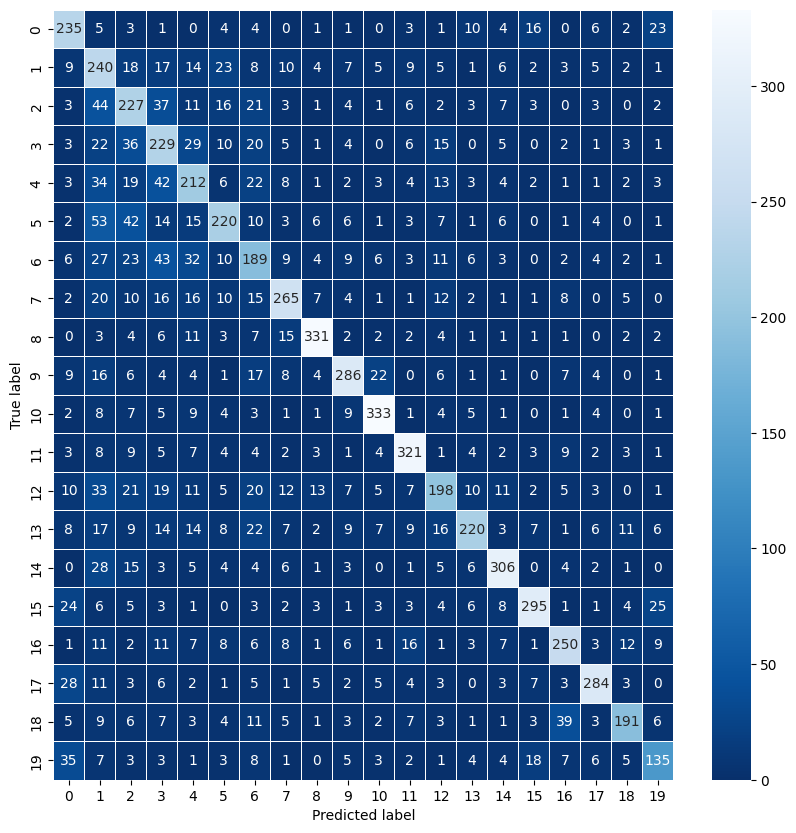

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='.0f', linewidths=0.5, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')